In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('coffee_sales(1).csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,sales
0,1,2023-10-23,10:35:58,1,10,Upper East Side,94,3.64,Coffee,Barista Espresso,Cappuccino Sm,October,3.64
1,2,2023-07-19,08:30:24,1,4,Upper East Side,36,2.83,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,July,2.83
2,3,2023-06-30,18:28:53,3,2,Midtown,35,2.70,Bakery,Muffin,Chocolate Chip Muffin,June,8.10
3,4,2023-06-29,06:44:28,3,8,Brooklyn,12,3.59,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,June,10.77
4,5,2023-01-09,12:22:37,2,7,Upper East Side,54,3.32,Bakery,Muffin,Blueberry Muffin,January,6.64


In [76]:
#checking fornnulls
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [77]:
# dropping "product_id" and "store_id"
df.drop(columns = ["store_id", "product_id"], inplace = True)

In [78]:

#rename columns
df.rename(columns = {'transaction_id': 'id',
                     'transaction_date': 'date',
                     'transaction_time': 'time',
                     'transaction_qty': 'quantity',
                     'store_location': 'location',
                     'product_category': 'category',
                     'product_type': 'product',
                     'product_detail': 'detail'}, inplace = True)

In [79]:
# check duplicated rows
df.duplicated().any()

np.False_

In [80]:
# Find duplicated rows based on the 'id' column
duplicates = df[df.duplicated(subset='id', keep=False)]
duplicates

,id,date,time,quantity,location,unit_price,category,product,detail,month,sales


In [81]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2000 non-null   int64  
 1   date        2000 non-null   object 
 2   time        2000 non-null   object 
 3   quantity    2000 non-null   int64  
 4   location    2000 non-null   object 
 5   unit_price  2000 non-null   float64
 6   category    2000 non-null   object 
 7   product     2000 non-null   object 
 8   detail      2000 non-null   object 
 9   month       2000 non-null   object 
 10  sales       2000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [82]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

/tmp/ipython-input-1540527248.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [83]:
# sales
df['sales'] = df['quantity'] * df['unit_price']

In [84]:
# extract the day and year
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [85]:
# get the month name
df['month'] = df['date'].dt.day_name()

In [86]:
# extracting the hour from time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [87]:
# defining the time of the day
def get_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [88]:
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [89]:
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,month,sales,day,year,hour,time_of_day
0,1,2023-10-23,10:35:58,1,Upper East Side,3.64,Coffee,Barista Espresso,Cappuccino Sm,Monday,3.64,23,2023,10,Morning
1,2,2023-07-19,08:30:24,1,Upper East Side,2.83,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,Wednesday,2.83,19,2023,8,Morning
2,3,2023-06-30,18:28:53,3,Midtown,2.70,Bakery,Muffin,Chocolate Chip Muffin,Friday,8.10,30,2023,18,Evening
3,4,2023-06-29,06:44:28,3,Brooklyn,3.59,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Thursday,10.77,29,2023,6,Morning
4,5,2023-01-09,12:22:37,2,Upper East Side,3.32,Bakery,Muffin,Blueberry Muffin,Monday,6.64,9,2023,12,Afternoon


In [90]:
df.to_csv('cleaned_coffee_sales_dataset.csv')

#EDA & Metrics

In [91]:
palette = sns.set_palette(sns.color_palette("RdBu"))

#Total Revenue

In [92]:
total_revenue = df['sales'].sum()
(f'Total Revenue: ${total_revenue:,.2f}')

'Total Revenue: $13,716.02'

#Total Order

In [93]:
total_orders = df['id'].nunique()
(f'Total Order: {total_orders:,.2f}')

'Total Order: 2,000.00'

#Average Order Value(AOV)

In [94]:
aov = total_revenue/total_orders
(f'Average Order Value (AOV): {aov:,.2f}')

'Average Order Value (AOV): 6.86'

#Peak Sales Location & Revenue

In [95]:
peak_sales_location = df.groupby('location')['sales'].sum().idxmax()
(f'Peak Sales Location: {peak_sales_location}')

'Peak Sales Location: Midtown'

In [96]:
peak_sales_location_revenue = df.groupby('location')['sales'].sum().max()
(f'Peak Sales Location: ${peak_sales_location_revenue:,.2f}')

'Peak Sales Location: $2,935.27'

#Sales By Month

In [97]:
# sum of sales for each month
revenue = df.groupby('month')['sales'].sum().reset_index()
revenue

,month,sales
0,Friday,1985.31
1,Monday,2021.03
2,Saturday,1795.78
3,Sunday,2038.19
4,Thursday,2097.50
5,Tuesday,1860.14
6,Wednesday,1918.07


In [102]:

# Load updated dataset
coffee = pd.read_csv("coffee_sales(1).csv")

# Group by month to calculate total sales
revenue = coffee.groupby('month', as_index=False)['sales'].sum()

# Order months correctly
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
revenue['month'] = pd.Categorical(revenue['month'], categories=month_order, ordered=True)
revenue = revenue.sort_values('month')




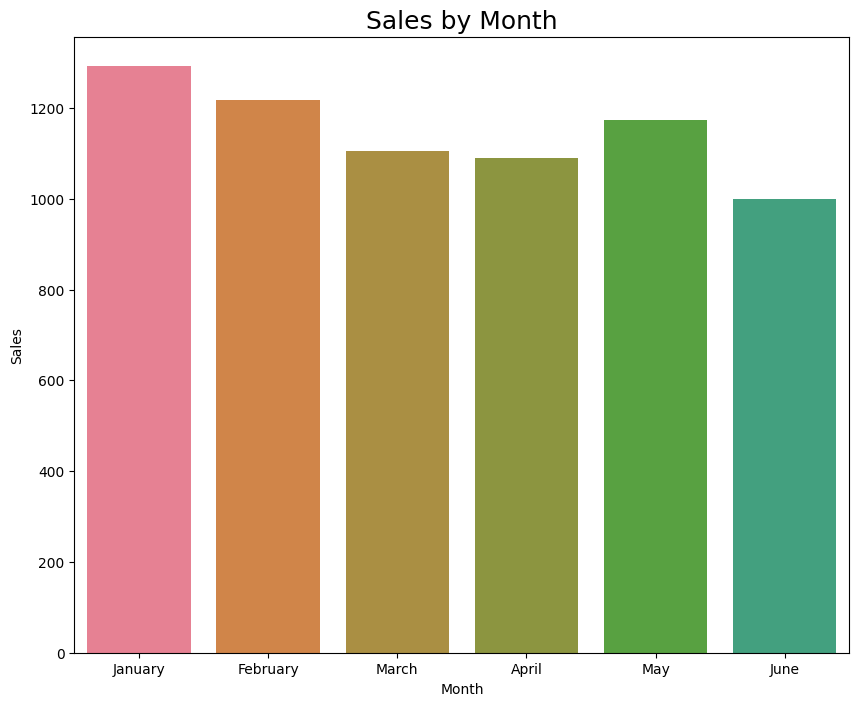

In [103]:
plt.figure(figsize=(10, 8))
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
sns.barplot(data = revenue, x = 'month', y = 'sales', hue = 'month', order = month_order, errorbar = None)
plt.title('Sales by Month', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#Sales by Location


In [104]:
# Sum of sales for each location
location_revenue = df.groupby('location')['sales'].sum().reset_index()
location_revenue

,location,sales
0,Brooklyn,2827.50
1,Lower Manhattan,2518.56
2,Midtown,2935.27
3,Queens,2567.23
4,Upper East Side,2867.46


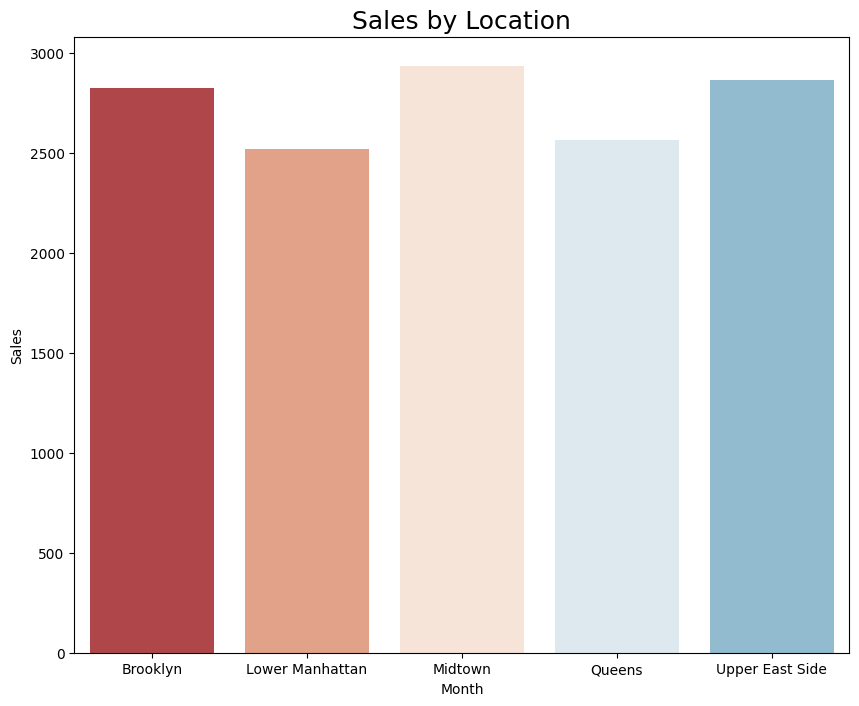

In [105]:
plt.figure(figsize=(10, 8))
sns.barplot(data = location_revenue, x = 'location', y = 'sales', hue = 'location', errorbar = None)
plt.title('Sales by Location', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#Top 10 Popular Product by Revenue

In [106]:
product_revenue = df.groupby('product')['sales'].sum().reset_index()
product_revenue

,product,sales
0,Barista Espresso,1052.96
1,Brewed Chai tea,1275.40
2,Croissant,771.64
3,Drip coffee,1038.05
4,Gourmet brewed coffee,1210.79
5,Green tea,1217.36
6,Herbal tea,1221.33
7,Hot chocolate,4119.52
8,Muffin,792.31
9,Scone,1016.66


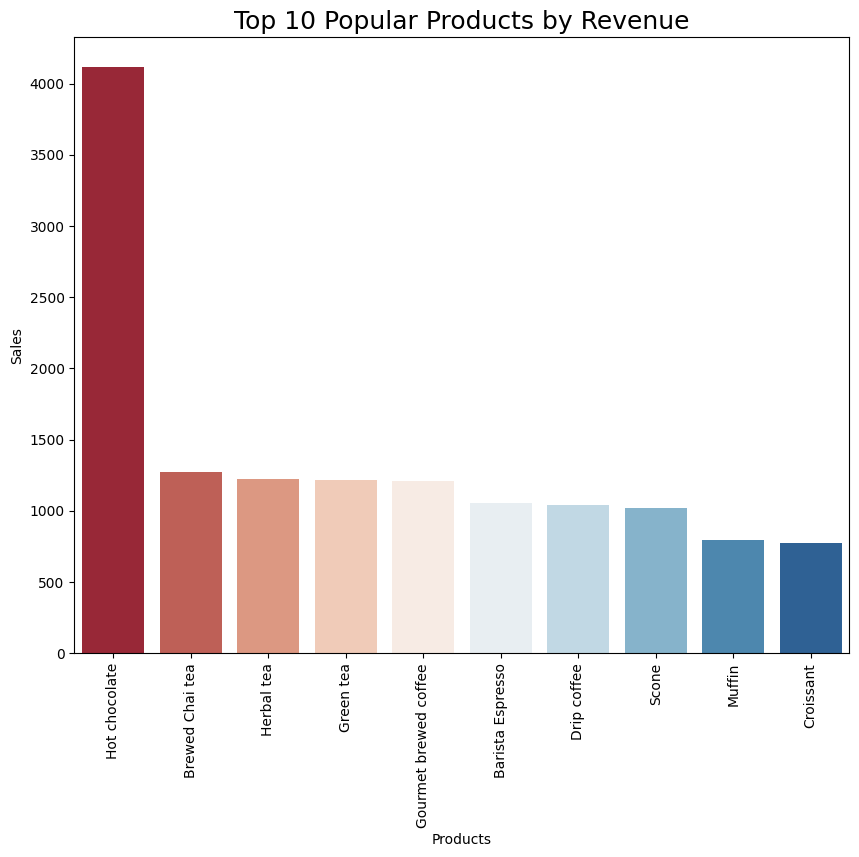

In [107]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'product', y = 'sales', hue='product', palette='RdBu', data = product_revenue.sort_values('sales', ascending = False)[0:10])
# x-axis rotation
plt.xticks(rotation=90)
plt.title('Top 10 Popular Products by Revenue', fontsize = 18)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.show()

#Average order Value (AOV) by Product Category

In [108]:
category_aov = df.groupby('category')['sales'].mean().reset_index()
category_aov

,category,sales
0,Bakery,5.479002
1,Coffee,6.807835
2,Drinking Chocolate,8.157465
3,Tea,6.890705


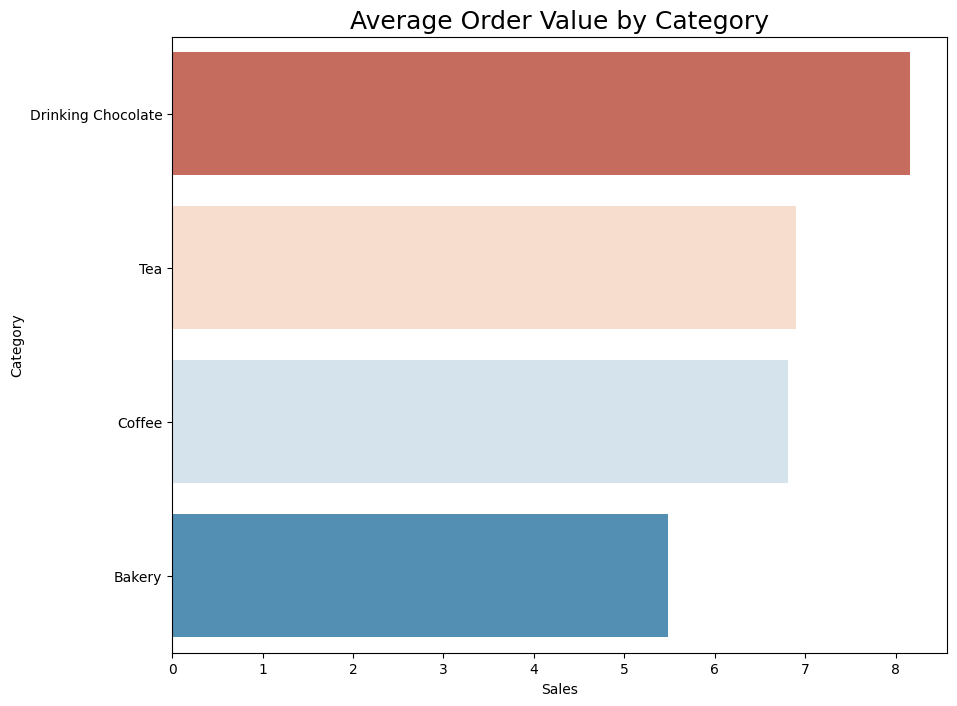

In [109]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'sales', y = 'category', hue = 'category', palette='RdBu', data = category_aov.sort_values('sales', ascending = False))
plt.title('Average Order Value by Category', fontsize = 18)
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

#Popular category

In [110]:
# count of category
category_count = df['category'].value_counts().reset_index()
category_count

,category,count
0,Tea,539
1,Drinking Chocolate,505
2,Coffee,485
3,Bakery,471


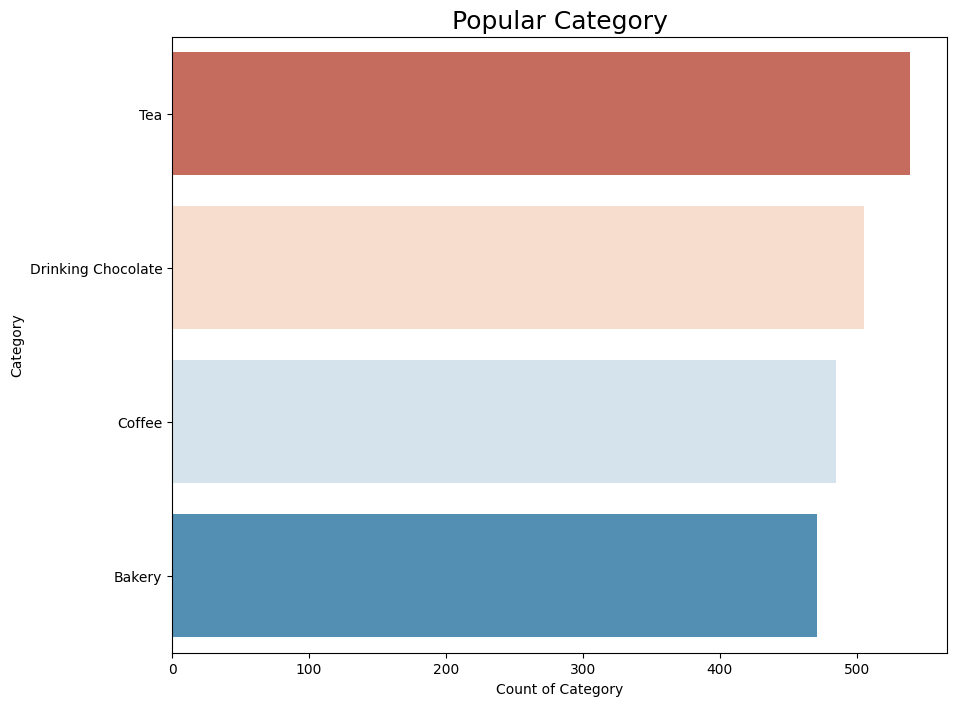

In [111]:
plt.figure(figsize = (10, 8))
sns.barplot(data = category_count, x = 'count', y = 'category', hue = 'category', palette='RdBu')
plt.title('Popular Category', fontsize = 18)
plt.xlabel('Count of Category')
plt.ylabel('Category')
plt.show()

#Peak Hour

In [112]:
order_per_hour = df.groupby('hour')['id'].count().reset_index()
order_per_hour

,hour,id
0,6,136
1,7,163
2,8,145
3,9,132
4,10,129
5,11,112
6,12,128
7,13,129
8,14,134
9,15,140


from matplotlib import pyplot as plt
order_per_hour['hour'].plot(kind='hist', bins=20, title='hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
order_per_hour['count_of_orders'].plot(kind='hist', bins=20, title='count_of_orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
order_per_hour.plot(kind='scatter', x='hour', y='count_of_orders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hour']
  ys = series['count_of_orders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = order_per_hour.sort_values('hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hour')
_ = plt.ylabel('count_of_orders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['hour']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'hour'}, axis=1)
              .sort_values('hour', ascending=True))
  xs = counted['hour']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = order_per_hour.sort_values('hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hour')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
order_per_hour['hour'].plot(kind='line', figsize=(8, 4), title='hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
order_per_hour['count_of_orders'].plot(kind='line', figsize=(8, 4), title='count_of_orders')
plt.gca().spines[['top', 'right']].set_visible(False)

In [113]:
# rename columns
order_per_hour.rename(columns = {'id':'count_of_orders'}, inplace = True)

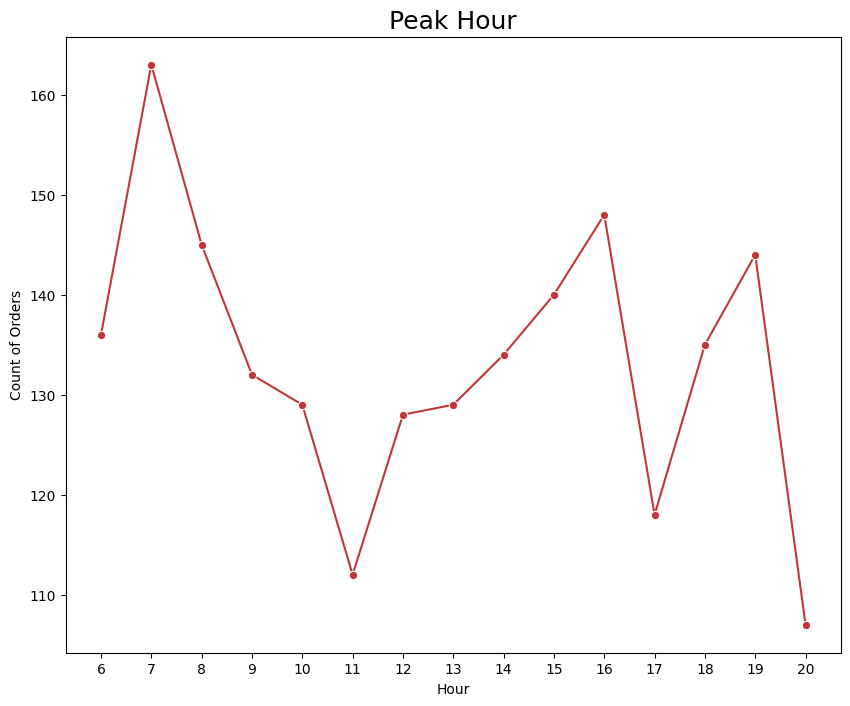

In [114]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'hour', y = 'count_of_orders', data = order_per_hour, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Peak Hour', fontsize = 18)
# Set the x-axis limits to the min and max values of 'hour'
plt.xticks(range(order_per_hour['hour'].min(), order_per_hour['hour'].max() + 1))
plt.show()

#Peak Day

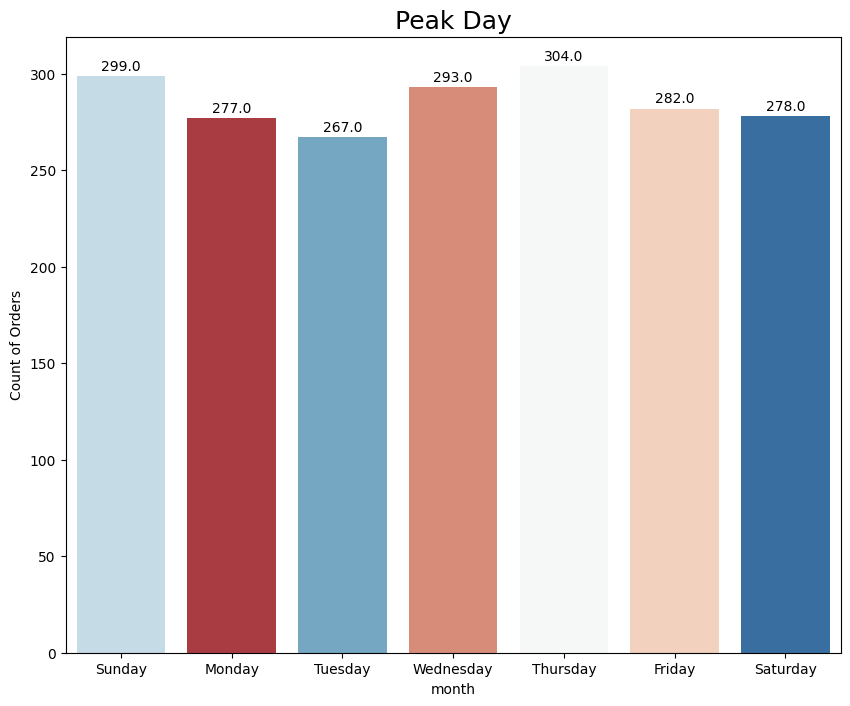

In [116]:
plt.figure(figsize = (10, 8))
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(x = 'month', data = df, hue = 'month', palette='RdBu', order = weekdays_order)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),   # x and y position of the text
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords='offset points')

plt.xlabel('month')
plt.ylabel('Count of Orders')
plt.title('Peak Day', fontsize = 18)
plt.show()

#Distribution of order across diffrent coffe types

In [117]:
coffee_type = df[df['category'] == 'Coffee'][['product']]
coffee_type

,product
0,Barista Espresso
1,Gourmet brewed coffee
9,Gourmet brewed coffee
12,Gourmet brewed coffee
18,Drip coffee
...,...
1981,Gourmet brewed coffee
1988,Barista Espresso
1990,Gourmet brewed coffee
1996,Barista Espresso


In [118]:
coffee_type_count = coffee_type['product'].value_counts().reset_index()
coffee_type_count

,product,count
0,Gourmet brewed coffee,177
1,Drip coffee,155
2,Barista Espresso,153


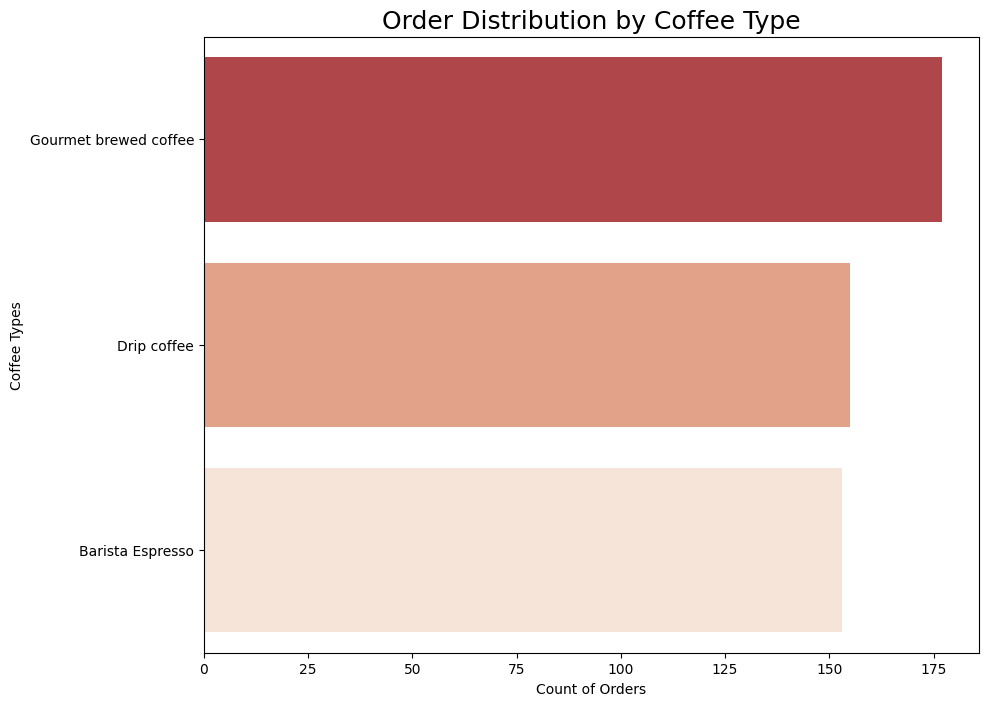

In [119]:
plt.figure(figsize = (10, 8))
sns.barplot(data = coffee_type_count, x = 'count', y = 'product', hue = 'product' )
plt.title('Order Distribution by Coffee Type', fontsize = 18)
plt.xlabel('Count of Orders')
plt.ylabel('Coffee Types')
plt.show()